# **Infection Fatality Rate Process Notebook**

## Author: Zehao Zhang
## Date: 10th Nov

### Introduction

The purpose of this section is to present and compare **Infection Fatality Rate(IFR)** among countries. This notebook calculate the IFR as a percentage by taking considering the average number of infections over-time using: 
$IFR=\frac{number\ of\ deaths\ from\ COVID}{number\ of\ infected\ individuals\ from\ COVID}*100$

As models use different assumptions, if these do not hold for a specific country, the data becomes less relevant and therefore won't accurately estimate the number of infected cases.

A couple of features of the models include: 

Imperial College London (ICL): 
* Age-structured SEIR model fouceses on low-and middle-income countries
* Model uses age and country-specific data on demographics patterns of social contact, hospital availability and risk of hospitalisation and death
* assumes sufficient access to healthcare
* assumes change in transmission over time is a function of average mobility trends


The Institute for Health Metrics and Evaluation (IHME)
* model uses different data to simulate transmission and disease progression: mobility, social distancing policies, population density, pneumonia seasonality and death rate, air pollution, altitude, smoking rates and self-reported contacts and mask use. 
* death model assumes relationship between confirmed deaths, confirmed cases and testing levels. For example, decreasing CFR is reflective of increasing testing and shift toward testing mild or asymptomatic cases.


Youyang Gu (YYG)
* Model created and optimised for the US
* assumptions on how reopening will affect social distancing and ultimately transmission. 


The London School of Hydiene & Tropicala Medicine (LSHTM)
* assumes delay adjusted CFR of 1.4% baseline that does not account for different age distributions outside China. This means there is an overestimation for younger populations and underestimation in countries with older populations. 

### Import Libraries
The code below imports essential packages in order to conduct such analysis.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime
import io
import plotly.io as pio
pio.renderers.default = "png"
pd.options.mode.chained_assignment = None
from math import log10, floor
import sympy as sp 
pd.options.mode.chained_assignment = None 
from sklearn.linear_model import LinearRegression

The libraries have been imported in the code above.

Now we need to install Orca package, it converts the interactive plotly graphs into static images, so that the plotly charts are able to display when downloaded either in pdf or ipynb files when uploaded into Github. This package installation is retreived from: https://plotly.com/python/orca-management/

In [2]:
'''!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4
'''

'!pip install plotly>=4.7.1\n!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca\n!chmod +x /usr/local/bin/orca\n!apt-get install xvfb libgtk2.0-0 libgconf-2-4\n'

All required libraies and packages are installed in the section above. Now we can continue with reading in all the raw data that will be used in the following analysis.

## Load in Datasets


The code below lists the countries of interest: United States, India, Russia, Brazil, South Africa, Australia (one from each continent). The purpose of this is to assist with further analysis by having the names of the countries stored as a variable and therefore reducing any repitition.

In [3]:
countries=['Australia', 'Brazil', 'India', 'Russia', 'South Africa', 'United States']

The code below lists the countries of interest: United States, India, Russia, Brazil, South Africa, Australia (one from each continent). The purpose of this is to assist with further analysis by having the names of the countries stored as a variable and therefore reducing any repitition.

In [4]:
# loads different datasets
covid=pd.read_csv("https://raw.github.sydney.edu.au/swan9801/R13B-Group4-COVID/master/Process%20Notebooks/Cleaned%20data/covid%20(1).csv?token=AAAA4MH4KB7QXXXTG7OJUZ27XTI2O")
estimate=pd.read_csv("https://raw.github.sydney.edu.au/swan9801/R13B-Group4-COVID/master/Process%20Notebooks/Cleaned%20data/estimate.csv?token=AAAA4MGMYBOTETS4QHKOEES7XTI42")
icl = pd.read_csv("https://raw.github.sydney.edu.au/swan9801/R13B-Group4-COVID/master/Process%20Notebooks/Cleaned%20data/icl.csv?token=AAAA4MAF64ULHGF6T6EDYZC7XTI6S")
ihme=pd.read_csv("https://raw.github.sydney.edu.au/swan9801/R13B-Group4-COVID/master/Process%20Notebooks/Cleaned%20data/ihme.csv?token=AAAA4MDYNXHI262IKQQ35727XTI7U")
ishtm = pd.read_csv("https://raw.github.sydney.edu.au/swan9801/R13B-Group4-COVID/master/Process%20Notebooks/Cleaned%20data/ishtm.csv?token=AAAA4MAQEQVPHTLTD74IM3K7XTJAY")
yyg = pd.read_csv("https://raw.github.sydney.edu.au/swan9801/R13B-Group4-COVID/master/Process%20Notebooks/Cleaned%20data/yyg.csv?token=AAAA4MEVYX4T4VUQOS4GACS7XTJBS")

From our previous study, we have already find the most suitable model is the model of Institute for Health Metrics and Evaluation for each country. The code below is to select the data seperately from different model datasets.

In [5]:
# ihme model for India
ihme_india=ihme[ihme["Entity"]=="India"]
ihme_india['Date']=pd.to_datetime(ihme_india['Date'], errors='ignore')

# ihme model for Brazil
ihme_brazil=ihme[ihme["Entity"]=="Brazil"]
ihme_brazil['Date']=pd.to_datetime(ihme_brazil['Date'], errors='ignore')

# ihme model for US
ihme_brazil=ihme[ihme["Entity"]=="United States"]
ihme_brazil['Date']=pd.to_datetime(ihme_brazil['Date'], errors='ignore')

# ihme model for South Africa
ihme_sa = ihme[ihme["Entity"] == "South Africa"]
ihme_sa['Date']=pd.to_datetime(ihme_sa['Date'], errors='ignore')

# ihme model for Russia
ihme_ru = ihme[ihme['Entity'] == 'Russia']
ihme_ru['Date']=pd.to_datetime(ihme_ru['Date'], errors='ignore')

# ihme model for Australia
ihme_au = ihme[ihme["Entity"] == "Australia"]
ihme_au['Date']=pd.to_datetime(ihme_au['Date'], errors='ignore')

Now we can use variables to access model datasets in different countries.

In [6]:
# Different Country
india = covid[covid["location"]=="India"]
brazil = covid[covid["location"]=="Brazil"]
usa= covid.loc[covid['location'] == "United States"]
sa = covid[covid["location"]=="South Africa"]
russia = covid[covid["location"]=="Russia"]
australia = covid[covid["location"]=="Australia"]

We can visualise this model and the 95% uncertainity interval with the confirmed cases. The code below plots the confirmed cases, the mean estimated infections and the lower and upper bounds of these estimations on the same plot.

## Plots of Infection Estimates

Firstly, we use a list to set all targets countryies into a group and give a unique colour for each country. Next, 'plot_estimate' function is implemented to draw plots of infection estimates for each countries.

In [7]:
# Set all targets countries as a group
countries=['Australia', 'Brazil', 'India', 'Russia', 'South Africa', 'United States']
# Set unique colours for each country
dict_colours={"Australia":"gold","Brazil":"forestgreen","India":"tomato","Russia":"crimson","South Africa":"mediumpurple","United States":"cyan"}
# This function is used to plotting infection estimates for each country.
def plot_estimate(country):
    model_data = ihme
    model_country = model_data[model_data["Entity"]==country]
    country_colour = dict_colours[country]
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=model_country["Date"], 
                             y=model_country["ihme_mean"],
                             line=dict(color=country_colour, width=3), name="Estimated using IHME model with 95% CI "))

    fig.add_trace(go.Scatter(x=model_country["Date"], 
                             y=model_country["ihme_lower"],
                             line=dict(color='grey', width=0.5), showlegend=False))

    fig.add_trace(go.Scatter(x=model_country["Date"], 
                             y=model_country["ihme_upper"],
                             line=dict(color='grey', width=0.5),
                             fillcolor="rgba(0,40,100,0.2)", fill = 'tonexty',showlegend=False))
    
    fig.add_trace(go.Scatter(x=model_country["Date"], 
                             y=model_country["daily_new_confirmed"],
                             line=dict(color=country_colour, width=3,dash = "dot"), name="Confirmed"))
    fig.update_xaxes(title_text="Date",tickangle = 290)
    fig.update_yaxes(title_text="Number of Infections")
    fig.update_layout(
        title={
            'text': "Average daily infections using IHME model for {}".format(country),
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
    fig.show()


As the reminder saying, enter the name of the country in order to see the exclusive **Average daily infections using IHME model chart** of this country.

Which country do you want to view? Australia


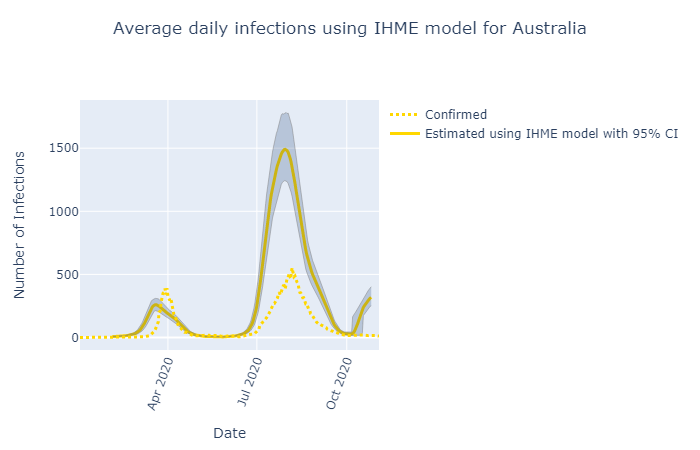

In [8]:
target = input("Which country do you want to view? ")
plot_estimate(target)

Evidently, the number of infections outweighs the confirmed cases and demonstrates the significance it plays in calculating the IFR. While the total deaths are still underestimated, the CFR calculated is generally an overestimation of the death rate and is therefore incorrect in explaining how deadly COVID-19 is. 

## Calculate IFR

The code below creates a function that calculates the IFR using one input, the name of the country. Embeded in the function, `calculate_IFR` is another function called `round_to_1` that ensures that that the uncertainity is written to 1 significant figure. In science, when writing a `value ± uncertainity`, the `uncertainity` must be written to 1 significant figure and the `value` to the same number of decimal places as the `uncertainity`. The function below accounts for this format and returns the the IFR and its uncertainty for a given country.

In [9]:
# This function is used to calculate IFR for each country.
def calculate_IFR(country):
    model_data=ihme
    covid_country=covid[covid["location"]==country]
    model_country=model_data[model_data["Entity"]==country]

    ifr_model=covid_country["total_deaths"].max()*100/model_country["ihme_mean"].sum()
    ifr_model_upper=covid_country["total_deaths"].max()/model_country["ihme_upper"].sum()
    ifr_model_lower=covid_country["total_deaths"].max()/model_country["ihme_lower"].sum()
    error_range=abs(ifr_model_upper-ifr_model_lower)*100/2
    
    def round_to_1(x):
        return round(x, -int(floor(log10(abs(x)))))
    
    u=round_to_1(error_range)
    dp=str(u)[::-1].find('.')
    
    return [round(ifr_model,dp),u]
#     print("{} ± {}".format(round(ifr_model,dp),u))

To make it more clear, the code below aims to draw a table to show IFRs of each country with the uncertain range.

In [10]:
# Create a new data frame
IFR_relation=pd.DataFrame(columns=["location", "IFR", "Uncertainty"])
# Create a table
for i in range(6):
    IFR,U=calculate_IFR(countries[i])
    IFR_relation.loc[i]=[countries[i],IFR,U]
IFR_relation

,location,IFR,Uncertainty
0,Australia,1.10,0.30
1,Brazil,0.35,0.03
2,India,0.19,0.01
3,Russia,0.52,0.04
4,South Africa,0.28,0.06
5,United States,0.73,0.06
